# **WASP Summer School**
## Behavior Tree Challenge

## Install the code repository and the used packages.

In [ ]:
#!apt-get update #If apt install fails, run this

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [61.8 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Ign:13 https://developer.download.nvidia.com/

In [4]:
#Make sure all code is available
!rm -r WASP-CBSS-BT/
!git clone https://github.com/jstyrud/WASP-CBSS-BT.git
!pip install celluloid
!apt install imagemagick

rm: cannot remove 'WASP-CBSS-BT/': No such file or directory
Cloning into 'WASP-CBSS-BT'...
remote: Enumerating objects: 631, done.
remote: Counting objects: 100% (631/631), done.
remote: Compressing objects: 100% (331/331), done.
remote: Total 631 (delta 320), reused 596 (delta 293), pack-reused 0
Receiving objects: 100% (631/631), 8.70 MiB | 26.13 MiB/s, done.
Resolving deltas: 100% (320/320), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscri

## Import the modules.

*Note that if you are not running the notebook on Colab, the paths might differ.*  
*In such a case run the following command on a shell to output the content of the current working directory.*  
```bash
!ls
```

In [5]:
#Setup paths and imports
import sys
sys.path.insert(0,'/content/WASP-CBSS-BT')
from IPython.display import Image
import simulation.notebook_interface as notebook_interface
import simulation.behavior_tree as behavior_tree
behavior_tree.load_settings_from_file('/content/WASP-CBSS-BT/simulation/tests/BT_TEST_SETTINGS.yaml')

## Build your own Behavior Tree and test it!

Writing behavior_tree.png
Writing behavior_tree.svg


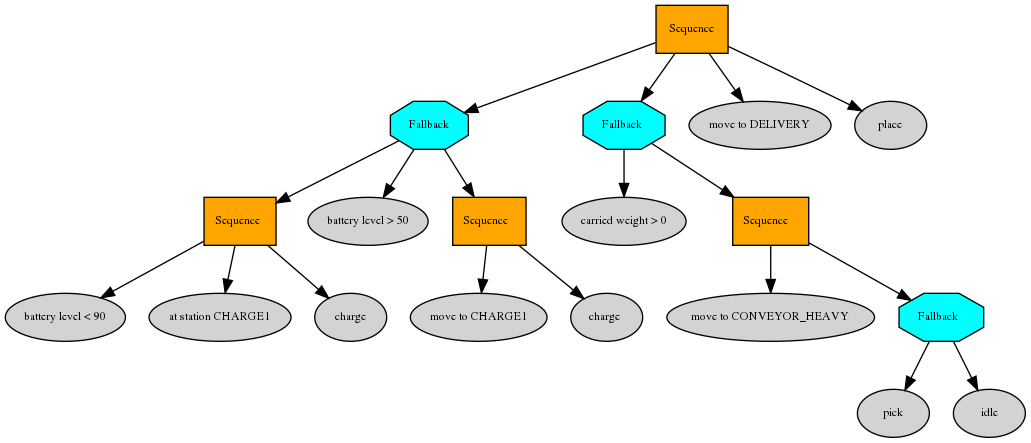

In [43]:
#Setup individual an show it
individual = ['s(', 'f(', 's(', 'battery level < 90', 'at station CHARGE1', 'charge', ')', \
                          'battery level > 50', 's(', 'move to CHARGE1', 'charge', ')', ')', \
                    'f(', 'carried weight > 0', 's(', 'move to CONVEYOR_HEAVY', 'f(', 'pick', 'idle', ')', ')', ')', \
                    'move to DELIVERY', 'place', ')']

environment = notebook_interface.Environment(seed=0, verbose=False)
environment.plot_individual('', 'behavior_tree', individual)

Image('behavior_tree.png')  

In [8]:
#Run individual and print result
print("Fitness:", environment.get_fitness(individual, show_world=True)) 

Fitness: 16.45


In [9]:
#Animate the last run (that had show_world=True)
#Execute the cell twice to run the animation!!
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pathlib import Path
gifPath = Path("/content/animation.gif")
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    Image(data=f.read(), format='png')

In [10]:
#Step the run instead, first reset the environment
step_environment = notebook_interface.Environment(seed=0, verbose=False)

Writing behavior_tree.png
Writing behavior_tree.svg


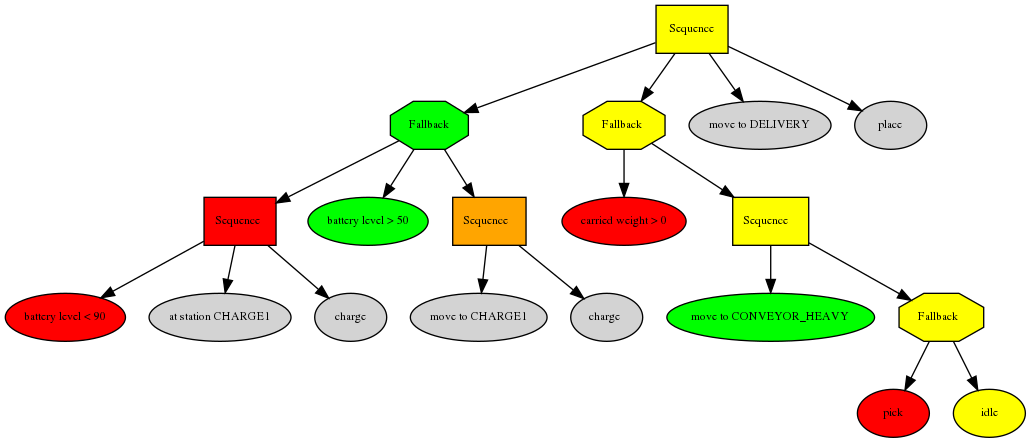

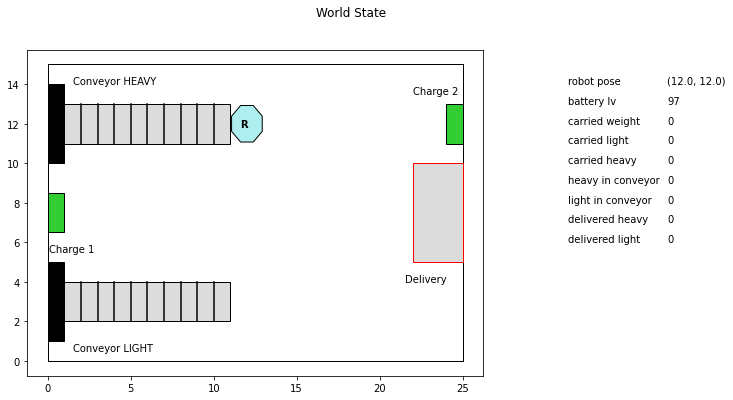

In [12]:
#Step the run one step.
#Execute the cell again to step forward.
#Color coding of states:
#green  = success
#red    = failure
#yellow = running
#gray   = not ticked
for _ in range(1):
    step_environment.step(individual, show_world=True)
    step_environment.pytree.save_fig('','behavior_tree', static=False)
    
    with open(Path("/content/behavior_tree.png"),'rb') as f:
      Image(data=f.read(), format='png')